# Problem set 4: Analyzing data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import pandas as pd
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [5]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [6]:
# hint, nah1_api = DstApi('?') 
# hint, params = nah1_api._define_base_params(language='en')

# nah1 = nah1_api.get_data(?)

nah1_api = DstApi('nah1')
params = nah1_api._define_base_params(language='en')

nah1 = nah1_api.get_data(params)

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [7]:
# hint, nah1_true.rename(?,inplace=True)

nah1.rename(columns=columns_dict, inplace=True)

# for key,value in var_dict.items():
#   nah1.variable.replace(?)

for key, value in var_dict.items():
  nah1.variable.replace(key, value, inplace=True)

#for key,value in unit_dict.items():
#   nah1.unit.replace(?)
  
for key, value in unit_dict.items():
  nah1.unit.replace(key, value, inplace=True)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [8]:
# write you code here
# nah1.value = nah1.value.astype('float')

def filter_nah1(var_dict):
    """
    Filter nah1 dataframe based on values in var_dict.

    Args:
        var_dict (dict): A dictionary containing variable-value pairs.

    Returns:
        filtered_nah1 (DataFrame): Filtered DataFrame containing rows
                                    satisfying conditions from var_dict.
    """

    cond = False
    for key, value in var_dict.items():
        cond = cond | (nah1.variable == value) # | is a bitwise logical OR-operator - checks whether the value associated with the current key matches the corresponding values in the nah1
    filtered_nah1 = nah1[cond]
    return filtered_nah1

nah1 = filter_nah1(var_dict)

# nah1.value = nah1.value.astype('float')
nah1.value = nah1.value.astype('float')

## The '|' vs 'OR' operator

In Python, the 'OR' operator (written 'or') is primarily used for boolean logical operations, and while it can work 
for combining conditions, it might not behave as expected when used for this purpose in certain contexts, 
such as when trying to accumulate conditions in a loop for filtering a DataFrame.

The main issue is typically the fact that the boolean 'OR' operator performs short-circuiting, meaning that if 
the first operand/condition evaluates to true, Python does not evaluate the second condition. By definition of
the operator the overall result would already be true if one of the conditions evaluates to True. 

Using the '|' operator ensures that both conditions/operands are evaluated and then evaluated correctly.

**Step 4:** Discuss what the following summary statistics show.

In [9]:
# nah1.groupby(['variable','unit']).describe()

nah1.groupby(['variable','unit']).describe()

year                                                       \
                 count    mean        std     min      25%     50%      75%   
variable unit                                                                 
C        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
G        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
I        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
M        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
X        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
Y        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2023.0  58.0  8.245040e+05  5.470365e+05    62576.0   
         real     2023.0  58.0  1.076335e+06  2.899323e+05   549491.0   
G        nominal  2023.0  58.0  2.792485e+05  1.923473e+05    14768.0   
         real     2023.0  58.0  3.763944e+05  1.050996e+05   171307.0   
I        nominal  2023.0  58.0  2.443793e+05  1.745084e+05    21134.0   
         real     2023.0  58.0  2.867239e+05  1.180796e+05   127630.0   
M        nominal  2023.0  58.0  4.892097e+05  4.315943e+05    24406.0   
         real     2023.0  58.0  5.193109e+05  3.540163e+05   112171.0   
X        nominal  2023.0  58.0  5.528596e+05  4.986340e+05    23110.0   
         real     2023.0  58.0  6.026687e+05  3.985825e+05   123594.0   
Y        nominal  2023.0  58.0  1.947509e+06  1.408479e+06   144582.0   
         real     2023.0  58.0  2.398232e+06  8.734029e+05  1089347.0   

                                                                
                         25%        50%         75%        max  
variable unit                                                   
C        nominal   331396.75   760812.5  1313458.75  1909003.0  
         real      848126.75  1049562.0  1353608.75  1569998.0  
G        nominal   109026.50   245849.5   473857.00   629928.0  
         real      312263.75   359337.5   484169.25   538248.0  
I        nominal    81899.50   200249.0   364978.50   676212.0  
         real      183260.00   251935.0   363662.25   567588.0  
M        nominal   137277.00   319217.5   830904.25  1668327.0  
         real      214768.00   375838.5   836879.75  1361759.0  
X        nominal   137473.50   373041.0   910000.25  1982502.0  
         real      250584.00   481929.0   935698.25  1600741.0  
Y        nominal   696373.00  1644185.0  3113699.50  5254759.0  
         real     1616288.50  2247981.5  3208718.00  4128962.0

**Grouping by variables:**

- The DataFrame nah1 is grouped based on unique combinations of 'variable' and 'unit'. This means that statistics will be calculated separately for each combination of these two variables.

**Summary statistics:**

- For each group, summary statistics are computed for all numerical columns in nah1. These statistics include:
    - Count: The number of non-null values in each group.
    - Mean: The average value of the numerical data in each group.
    - Standard Deviation: A measure of the dispersion of data points around the mean.
    - Minimum and Maximum: The minimum and maximum values observed in each group.
    - 25th, 50th (median), and 75th percentiles: These percentiles provide information about the distribution of values within each group.

**Interpretations:**
- Count: Indicates the number of observations for each group. Higher counts suggest more data points available for analysis.
- Mean: Gives an idea of the central tendency of the data within each group. Higher or lower means indicate higher or lower average values, respectively.
- Standard Deviation: Provides information about the variability or spread of data within each group. Higher standard deviations suggest more dispersed data.
- Minimum and Maximum: Show the range of observed values within each group.
- Percentiles: Offer insights into the distribution of values within each group, including the median and spread of values around it.

**Insights:**
- Identify patterns, variations, and outliers within different groups defined by 'variable' and 'unit'.
- Comparisons between groups to understand differences or similarities in their distributions.

**Step 5:** Sort the dataset by year

In [10]:
# nah1.sort_values(by='?',inplace=?)
# nah1.head()

nah1.sort_values(by='year', inplace=True)

**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [11]:
FT_api = DstApi('FT')
params = FT_api._define_base_params(language='en')
params['variables'][0]['values'] = ['000'] 
## 000 is the code for all of Denmark, this can be seen by using: FT_api.variable_levels('HOVEDDELE', language='en')
pop = FT_api.get_data(params=params)

pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
pop =  pop.loc[:,['year','population']]
pop.head()

,year,population
0,1834,1230964
1,1855,1507222
2,1890,2172380
3,1916,2921362
4,1935,3706349


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [12]:
# hint, merged = pd.merge(?,?,how='?',on=[?])
# merged_true.tail(10)

merged = pd.merge(nah1, pop, how='left', on=['year']) # how - left: use only keys from left frame, similar to a SQL left outer join; preserve key order
merged.tail(10)

,variable,unit,year,value,population
686,X,nominal,2023,1922593.0,5932654.0
687,M,real,2023,1361759.0,5932654.0
688,M,nominal,2023,1651328.0,5932654.0
689,G,nominal,2023,629928.0,5932654.0
690,C,nominal,2023,1909003.0,5932654.0
691,C,real,2023,1553609.0,5932654.0
692,Y,nominal,2023,5191284.0,5932654.0
693,Y,real,2023,4128962.0,5932654.0
694,I,real,2023,496237.0,5932654.0
695,G,real,2023,523052.0,5932654.0


**Answer:** See A2.py

In [13]:
# Illustration of the use of how='left' in Pandas merge():

# Creating left DataFrame
left_df = pd.DataFrame({'A': [1, 2, 3],
                        'B': ['a', 'b', 'c']})

# Creating right DataFrame
right_df = pd.DataFrame({'A': [2, 3, 4],
                         'C': ['x', 'y', 'z']})

# Merging left and right DataFrames using 'A' as the key column
merged_left_df = left_df.merge(right_df, how='left', on=['A'])

merged_right_df =left_df.merge(right_df, how='right', on=['A'])

print(left_df)
print('\n')
print(right_df)
print('\n')
print(merged_left_df)
print('\n')
print(merged_right_df)

   A  B
0  1  a
1  2  b
2  3  c


   A  C
0  2  x
1  3  y
2  4  z


   A  B    C
0  1  a  NaN
1  2  b    x
2  3  c    y


   A    B  C
0  2    b  x
1  3    c  y
2  4  NaN  z


**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [14]:
# pop_with_index = pop.set_index(?)
# pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
# merged_with_index = merged.set_index(?)
# merged_alt = merged_with_index.join(?)
# merged_alt.tail(10)

pop_with_index = pop.set_index('year') # sets the index to 'year' and removes 'year' as a column
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged.set_index('year') 
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2023,X,nominal,1922593.0,5932654.0,5932654.0
2023,M,real,1361759.0,5932654.0,5932654.0
2023,M,nominal,1651328.0,5932654.0,5932654.0
2023,G,nominal,629928.0,5932654.0,5932654.0
2023,C,nominal,1909003.0,5932654.0,5932654.0
2023,C,real,1553609.0,5932654.0,5932654.0
2023,Y,nominal,5191284.0,5932654.0,5932654.0
2023,Y,real,4128962.0,5932654.0,5932654.0
2023,I,real,496237.0,5932654.0,5932654.0


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

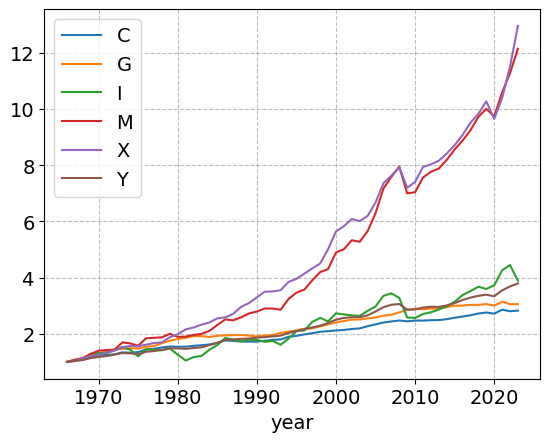

In [15]:
# a. split
nah1_true_grouped = nah1.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1.set_index(['variable','unit','year'],inplace=True)
nah1 = nah1.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1.reset_index(inplace=True)

# c. combine
nah1['indexed'] = nah1['value']/nah1['first']

# d. plot
def plot(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
plot(nah1)

**Question** Implement the same split-apply-combine as above using `transform`.

In [16]:
# def first(x): # select the first element in a series
#     return x.iloc[0]

# nah1_alt = nah1.copy()
# grouped = nah1_alt.groupby(?)
# nah1_alt[?] = ?.transform(lambda x: ?)
# nah1_alt.head()

nah1_alt = nah1.copy()
grouped = nah1_alt.groupby(['variable','unit'])
nah1_alt['index_transform'] = grouped['value'].transform(lambda x: x/ x.iloc[0])
nah1_alt.head()

# the transform() function is used to apply a function to each group separately and then return a DataFrame with the same shape as the original DataFrame

,variable,unit,year,value,first,indexed,index_transform
0,M,nominal,1966,24406.0,24406.0,1.0,1.0
1,X,real,1966,123594.0,123594.0,1.0,1.0
2,I,nominal,1966,21134.0,21134.0,1.0,1.0
3,I,real,1966,127630.0,127630.0,1.0,1.0
4,G,nominal,1966,14768.0,14768.0,1.0,1.0


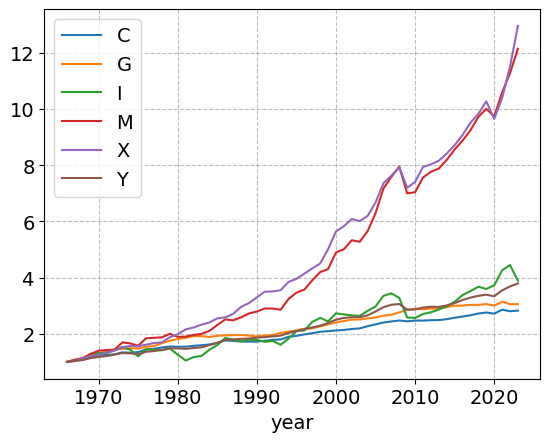

In [17]:
plot(nah1_alt,variable='index_transform')

**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [18]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.PeriodIndex(prices_long.d,freq='Q').to_timestamp() # Convert to datetime
# prices_long['date'] = pd.to_datetime(prices_long.d) This works just as well but throws a warning


# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [19]:
# a. Initiate dstapi 
folk1a_api = DstApi('FOLK1A')

# b. Define which data to load
params = folk1a_api._define_base_params(language='en')
params['variables'][1]['values'] = ['TOT']
params['variables'][2]['values'] = ['IALT']
params['variables'][3]['values'] = ['TOT']

# c. Load data
pop = folk1a_api.get_data(params=params)


# d. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# e. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# f. convert to date
pop['date'] = pd.PeriodIndex(pop.TID,freq='Q').to_timestamp() # Convert to datetime
del pop['TID']

pop.head()

,municipality,population,date
0,Brøndby,35050,2015-01-01
1,Frederiksberg,103192,2015-01-01
2,Brøndby,34084,2012-01-01
3,Copenhagen,551580,2012-04-01
4,Ærø,6322,2014-07-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

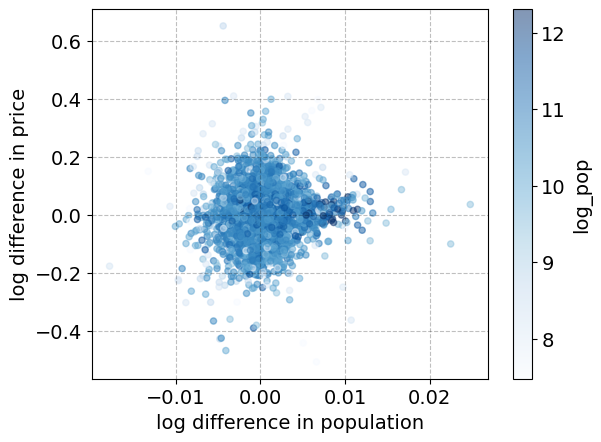

In [20]:
# figure 1

# a. Merge the prices_lon and the population data, so there is a new column called `population`
merge_pop_price = pop.merge(prices_long, how='left', on=['date','municipality'])
merge_pop_price.sort_values(['date', 'municipality'], inplace=True)

# b. Take logs of population and prices
merge_pop_price['log_pop'] = np.log(merge_pop_price['population'])
merge_pop_price['log_price'] = np.log(merge_pop_price['price'])

# take the log difference in population
merge_pop_price[['d_log_pop','d_log_price']] = merge_pop_price.groupby('municipality')[['log_pop','log_price']].diff(1) # computes the difference between each element and the element immediately following it

# c. Plotting
ax = merge_pop_price.plot(x = 'd_log_pop', y = 'd_log_price', kind = 'scatter',
               c='log_pop',cmap='Blues',alpha=0.5); 

ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price');

**Answer:** See A5.py for difference in population within municipality. See A6.py for average difference within municipality

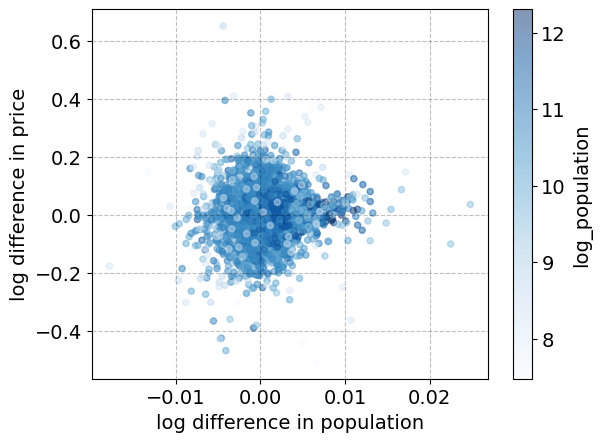

In [21]:
# Run is juptyer magic for running py files inside a notebook
%run -i A5.py

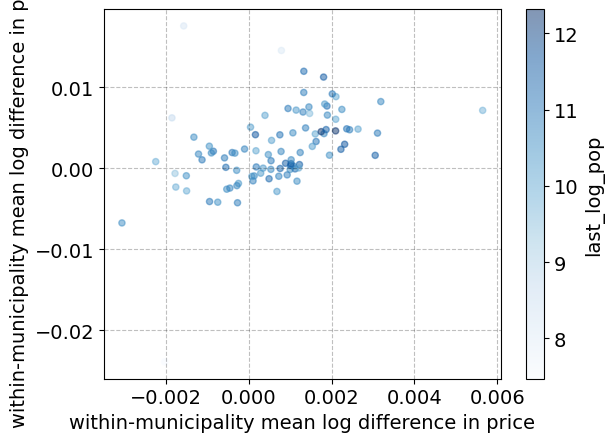

In [22]:
# figure 2

# c. mean log differences
def mean_diff(x):
    return np.mean(x.diff())

m_grouped = merge_pop_price.groupby('municipality').agg({'log_pop':[mean_diff,'last'],'log_price':mean_diff})
m_grouped.columns = ['md_log_pop','last_log_pop','md_log_price']


# d. Plotting
ax = m_grouped.plot(x = 'md_log_pop', y = 'md_log_price', kind = 'scatter',
               c='last_log_pop',cmap='Blues',alpha=0.5); 

ax.set_xlabel('within-municipality mean log difference in price') 
ax.set_ylabel('within-municipality mean log difference in price');

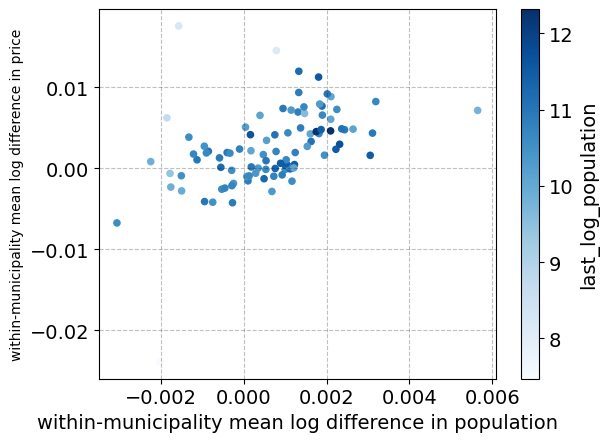

In [23]:
# Run is jupyer magic for running py files inside a notebook
%run -i A6.py